# Northeastern University: INFO6105 Data Science and Engineering Methods
## Zomato_EDA

*Economics of Happiness: Analysis using Cross Validation*

Megha Patel

# Abstract
Since 2002, the World Happiness Report has used statistical analysis to determine the world's happiest countries https://worldhappiness.report/. This report uses global survey data to report how people evaluate their own lives in more than 150 countries worldwide.

<br>In this notebook, we will analyze what factors play a role in making a country happy using data modeling. Using AutoML, we will find the best model that will help us predict Happiness Scores and use model interpretability to determine which factors contribute the most to predicting the Happiness Score. We will look at the happiness datasets from the years 2015-2022 and use each year as a test set to cross validate our model. By cross validating, we test how true the happiness report can be and see if we can use machine learning to predict happiness in countries using external factors.

##The Data:
* Economy (numeric): GDP per Capita
* Dystopia Residual (numeric): sum of the dystopia happiness score (1.85) ie score of a hypothetical country having rank lower than the lowest ranking country in the report, plus the residual value of each country
* Family (numeric): Social support value where citizens have someone to count on in times of trouble
* Health (numeric): Healthy life expectancy
* Freedom (numeric): Freedom to make life choices
* Generosity (numeric): proportion of citizens that reported donating money to charity, etc
* Trust (numeric): Perceptions of government corruption (High values meaning low trust)
* Region (categorical): Continent or location of the country
* Happiness Score (numeric): Indicator of a country’s social progress

##Initialize and Get the data

In [ ]:
#installing dependencies
!pip install eli5
!pip install shap
#installing h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
#importing all necessary libraries
%matplotlib inline
import random, os, sys
import h2o
import pprint
import operator
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import math
import shap

In [ ]:
!git clone https://github.com/aiskunks/The_Economics_of_Happiness.git

fatal: destination path 'The_Economics_of_Happiness' already exists and is not an empty directory.


In [ ]:
happiness2015 = pd.read_csv("/content/The_Economics_of_Happiness/CSV/World_Happiness_Report_2015.csv")
happiness2016 = pd.read_csv("/content/The_Economics_of_Happiness/CSV/World_Happiness_Report_2016.csv")
happiness2017 = pd.read_csv("/content/The_Economics_of_Happiness/CSV/World_Happiness_Report_2017.csv")
happiness2018 = pd.read_csv("/content/The_Economics_of_Happiness/CSV/World_Happiness_Report_2018.csv")
happiness2019 = pd.read_csv("/content/The_Economics_of_Happiness/CSV/World_Happiness_Report_2019.csv")
happiness2020 = pd.read_csv("/content/The_Economics_of_Happiness/CSV/World_Happiness_Report_2020.csv")
happiness2021 = pd.read_csv("/content/The_Economics_of_Happiness/CSV/World_Happiness_Report_2021.csv")
happiness2022 = pd.read_csv("/content/The_Economics_of_Happiness/CSV/World_Happiness_Report_2022.csv")

##Cleaning Up Data


Each year's happiness score dataset has some column names that are similar but have inconsistant names so will need to rename columns. We will also drop irrelevant columns such as standard error, confidence intervals, and whisker levels because these features are not consistantly present each year and will not help predict the happiness score because they display metrics.

#####*World Happiness Report 2015*

In [ ]:
happiness2015 = happiness2015.drop(["Standard Error", "Happiness Rank"], axis=1)

In [ ]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                158 non-null    float64
 3   Economy (GDP per Capita)       158 non-null    float64
 4   Family                         158 non-null    float64
 5   Health (Life Expectancy)       158 non-null    float64
 6   Freedom                        158 non-null    float64
 7   Trust (Government Corruption)  158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Dystopia Residual              158 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.5+ KB


#####*World Happiness Report 2016*

In [ ]:
happiness2016 =happiness2016.drop(["Lower Confidence Interval", "Upper Confidence Interval", "Happiness Rank"], axis=1)

In [ ]:
happiness2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Score                157 non-null    float64
 3   Economy (GDP per Capita)       157 non-null    float64
 4   Family                         157 non-null    float64
 5   Health (Life Expectancy)       157 non-null    float64
 6   Freedom                        157 non-null    float64
 7   Trust (Government Corruption)  157 non-null    float64
 8   Generosity                     157 non-null    float64
 9   Dystopia Residual              157 non-null    float64
dtypes: float64(8), object(2)
memory usage: 12.4+ KB


In [ ]:
regions = happiness2016[['Country', 'Region']]
regions.head()

,Country,Region
0,Denmark,Western Europe
1,Switzerland,Western Europe
2,Iceland,Western Europe
3,Norway,Western Europe
4,Finland,Western Europe


#####*World Happiness Report 2017*

In [ ]:
happiness2017.rename(columns={'Happiness score':'Happiness Score','Explained by: GDP per capita': 'Economy (GDP per Capita)','Explained by: Social support':'Family','Explained by: Healthy life expectancy': 'Health (Life Expectancy)', 'Explained by: Freedom to make life choices': 'Freedom','Explained by: Generosity':'Generosity','Explained by: Perceptions of corruption':'Trust (Government Corruption)','Dystopia (1.85) + residual':'Dystopia Residual'},inplace=True)
happiness2017=happiness2017.drop(["Whisker-high", "Whisker-low", "Unnamed: 11", "Unnamed: 12"], axis=1)

In [ ]:
happiness2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Score                155 non-null    float64
 2   Economy (GDP per Capita)       155 non-null    float64
 3   Family                         155 non-null    float64
 4   Health (Life Expectancy)       155 non-null    float64
 5   Freedom                        155 non-null    float64
 6   Generosity                     155 non-null    float64
 7   Trust (Government Corruption)  155 non-null    float64
 8   Dystopia Residual              155 non-null    float64
dtypes: float64(8), object(1)
memory usage: 11.0+ KB


In [ ]:
happiness2017 = pd.merge(happiness2017, regions, how='left', on=['Country'])

In [ ]:
happiness2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Score                155 non-null    float64
 2   Economy (GDP per Capita)       155 non-null    float64
 3   Family                         155 non-null    float64
 4   Health (Life Expectancy)       155 non-null    float64
 5   Freedom                        155 non-null    float64
 6   Generosity                     155 non-null    float64
 7   Trust (Government Corruption)  155 non-null    float64
 8   Dystopia Residual              155 non-null    float64
 9   Region                         150 non-null    object 
dtypes: float64(8), object(2)
memory usage: 13.3+ KB


#####*World Happiness Report 2018*

In [ ]:
happiness2018.rename(columns={'Score':'Happiness Score','Country or region': 'Country','GDP per capita': 'Economy (GDP per Capita)','Social support':'Family','Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom','Perceptions of corruption':'Trust (Government Corruption)'},inplace=True)
happiness2018=happiness2018.drop(["Overall rank"], axis=1)

In [ ]:
happiness2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [ ]:
happiness2018 = pd.merge(happiness2018, regions, how='left', on=['Country'])

#####*World Happiness Report 2019*

In [ ]:
happiness2019.rename(columns={'Score':'Happiness Score','Country or region': 'Country','GDP per capita': 'Economy (GDP per Capita)','Social support':'Family','Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom','Perceptions of corruption':'Trust (Government Corruption)'},inplace=True)
happiness2019=happiness2019.drop(["Overall rank"], axis=1)

In [ ]:
happiness2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [ ]:
happiness2019 = pd.merge(happiness2019, regions, how='left', on=['Country'])

#####*World Happiness Report 2020*

In [ ]:
happiness2020.rename(columns={'Ladder score':'Happiness Score','Country name': 'Country','Logged GDP per capita': 'Economy (GDP per Capita)','Social support':'Family','Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom','Perceptions of corruption':'Trust (Government Corruption)', 'Dystopia + residual':'Dystopia Residual'},inplace=True)
happiness2020 = happiness2020.drop(["Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption", "Ladder score in Dystopia", "Regional indicator", "Standard error of ladder score", "upperwhisker", "lowerwhisker"], axis=1)

In [ ]:
happiness2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        153 non-null    object 
 1   Happiness Score                153 non-null    float64
 2   Economy (GDP per Capita)       153 non-null    float64
 3   Family                         153 non-null    float64
 4   Health (Life Expectancy)       153 non-null    float64
 5   Freedom                        153 non-null    float64
 6   Generosity                     153 non-null    float64
 7   Trust (Government Corruption)  153 non-null    float64
 8   Dystopia Residual              153 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.9+ KB


In [ ]:
happiness2020 = pd.merge(happiness2020, regions, how='left', on=['Country'])

#####*World Happiness Report 2021*

In [ ]:
happiness2021.rename(columns={'Ladder score':'Happiness Score','Country name': 'Country','Logged GDP per capita': 'Economy (GDP per Capita)','Social support':'Family','Healthy life expectancy': 'Health (Life Expectancy)', 'Freedom to make life choices': 'Freedom','Perceptions of corruption':'Trust (Government Corruption)', 'Dystopia + residual':'Dystopia Residual'},inplace=True)
happiness2021=happiness2021.drop(["Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption", "Ladder score in Dystopia", "Regional indicator", "Standard error of ladder score", "upperwhisker", "lowerwhisker"], axis=1)

In [ ]:
happiness2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        149 non-null    object 
 1   Happiness Score                149 non-null    float64
 2   Economy (GDP per Capita)       149 non-null    float64
 3   Family                         149 non-null    float64
 4   Health (Life Expectancy)       149 non-null    float64
 5   Freedom                        149 non-null    float64
 6   Generosity                     149 non-null    float64
 7   Trust (Government Corruption)  149 non-null    float64
 8   Dystopia Residual              149 non-null    float64
dtypes: float64(8), object(1)
memory usage: 10.6+ KB


In [ ]:
happiness2021 = pd.merge(happiness2021, regions, how='left', on=['Country'])

#####*World Happiness Report 2022*

In [ ]:
happiness2022.rename(columns={'Happiness score':'Happiness Score','Explained by: GDP per capita': 'Economy (GDP per Capita)','Explained by: Social support':'Family','Explained by: Healthy life expectancy': 'Health (Life Expectancy)', 'Explained by: Freedom to make life choices': 'Freedom','Explained by: Generosity':'Generosity','Explained by: Perceptions of corruption':'Trust (Government Corruption)', 'Dystopia (1.83) + residual':'Dystopia Residual'},inplace=True)
happiness2022=happiness2022.drop(["Whisker-high", "Whisker-low", "RANK"], axis=1)

In [ ]:
happiness2022 = pd.merge(happiness2022, regions, how='left', on=['Country'])

In [ ]:
happiness2022.head(147)

,Country,Happiness Score,Dystopia Residual,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region
0,Finland,"7,821","2,518","1,892","1,258","0,775","0,736","0,109","0,534",Western Europe
1,Denmark,"7,636","2,226","1,953","1,243","0,777","0,719","0,188","0,532",Western Europe
2,Iceland,"7,557","2,320","1,936","1,320","0,803","0,718","0,270","0,191",Western Europe
3,Switzerland,"7,512","2,153","2,026","1,226","0,822","0,677","0,147","0,461",Western Europe
4,Netherlands,"7,415","2,137","1,945","1,206","0,787","0,651","0,271","0,419",Western Europe
...,...,...,...,...,...,...,...,...,...,...
142,Rwanda*,"3,268","0,536","0,785","0,133","0,462","0,621","0,187","0,544",NaN
143,Zimbabwe,"2,995","0,548","0,947","0,690","0,270","0,329","0,106","0,105",Sub-Saharan Africa
144,Lebanon,"2,955","0,216","1,392","0,498","0,631","0,103","0,082","0,034",Middle East and Northern Africa
145,Afghanistan,"2,404","1,263","0,758","0,000","0,289","0,000","0,089","0,005",Southern Asia


In [ ]:
happiness2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Country                        147 non-null    object
 1   Happiness Score                146 non-null    object
 2   Dystopia Residual              146 non-null    object
 3   Economy (GDP per Capita)       146 non-null    object
 4   Family                         146 non-null    object
 5   Health (Life Expectancy)       146 non-null    object
 6   Freedom                        146 non-null    object
 7   Generosity                     146 non-null    object
 8   Trust (Government Corruption)  146 non-null    object
 9   Region                         119 non-null    object
dtypes: object(10)
memory usage: 12.6+ KB


From the first two charts above we see that there is one country that has null values. in the first chart we see that the country is actually called "xx". This may have been a filler and with no real values, we can remove that instance. We can also see that all of the columns are objects which is inaccurate as all features except Country are decimals. This is caused by a misplace of commas instead of a decimal point so we will clean that up with a custom function.

In [ ]:
happiness2022 = happiness2022[happiness2022['Country'] != 'xx']

In [ ]:
def clean(value):
    if value=='NEW' or value=='-':
        return np.nan
    else:
        value=value.replace(',', '.')
        return float(value)

happiness2022['Happiness Score']=happiness2022['Happiness Score'].apply(clean)
happiness2022['Dystopia Residual']=happiness2022['Dystopia Residual'].apply(clean)
happiness2022['Economy (GDP per Capita)']=happiness2022['Economy (GDP per Capita)'].apply(clean)
happiness2022['Family']=happiness2022['Family'].apply(clean)
happiness2022['Health (Life Expectancy)']=happiness2022['Health (Life Expectancy)'].apply(clean)
happiness2022['Freedom']=happiness2022['Freedom'].apply(clean)
happiness2022['Generosity']=happiness2022['Generosity'].apply(clean)
happiness2022['Trust (Government Corruption)']=happiness2022['Trust (Government Corruption)'].apply(clean)
#happiness2022['Rating'].head()
happiness2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 145
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        146 non-null    object 
 1   Happiness Score                146 non-null    float64
 2   Dystopia Residual              146 non-null    float64
 3   Economy (GDP per Capita)       146 non-null    float64
 4   Family                         146 non-null    float64
 5   Health (Life Expectancy)       146 non-null    float64
 6   Freedom                        146 non-null    float64
 7   Generosity                     146 non-null    float64
 8   Trust (Government Corruption)  146 non-null    float64
 9   Region                         119 non-null    object 
dtypes: float64(8), object(2)
memory usage: 12.5+ KB



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

##Feature Analysis

During feature selection, we will check the quality of the data and determine which features are important. We will use statistical methods like p-value, t-statistics and visualization techniques like Q-Q plot and scatter plot of python's matplotlib and seaborn library to answer below questions about the dataset:
* Is the predictor variables independent of all the other predictor variables?
* Which predictor variables are the most important?


In [ ]:
data_frames = [happiness2015, happiness2016, happiness2017, happiness2020, happiness2021, happiness2022]
merged_df = pd.concat(data_frames,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged_df.fillna("", inplace=True)

In [ ]:
merged_df.describe()
merged_df.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


####*Imputing Data*

Before we analyze each feature, in 2018 and 2019, we are missing data on Dystopia Residual. While we cannot find the actual values, we can impute this column for each country using the averages for the country through the rest of the years.

In [ ]:
temp = merged_df.groupby('Country').mean()
temp = temp.reset_index()
#create temp2 table to hold just Country and Dystopia Residual
temp2 = pd.DataFrame({'Country': temp.reset_index()['Country'],'Dystopia Residual': temp['Dystopia Residual']})
temp2.head()


,Country,Dystopia Residual
0,Afghanistan,1.818986
1,Albania,1.821000
2,Algeria,2.372657
3,Angola,1.885993
4,Argentina,2.500732


In [ ]:
happiness2018 = pd.merge(happiness2018, temp2, how='left', on=['Country'])

In [ ]:
happiness2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        156 non-null    object 
 1   Happiness Score                156 non-null    float64
 2   Economy (GDP per Capita)       156 non-null    float64
 3   Family                         156 non-null    float64
 4   Health (Life Expectancy)       156 non-null    float64
 5   Freedom                        156 non-null    float64
 6   Generosity                     156 non-null    float64
 7   Trust (Government Corruption)  155 non-null    float64
 8   Region                         151 non-null    object 
 9   Dystopia Residual              154 non-null    float64
dtypes: float64(8), object(2)
memory usage: 13.4+ KB


In [ ]:
happiness2019 = pd.merge(happiness2019, temp2, how='left', on=['Country'])

In [ ]:
#add 2018 and 2019 report to merged dataframe
data_frames = [merged_df, happiness2018, happiness2019]
merged_df = pd.concat(data_frames,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged_df.fillna("", inplace=True)

###Standardizing

Now that our dataset is cleaned up, let us standardize the data to compare data in the same unit set. Standardizing data is good practice to define how data should be formatted, eliminate extraneous data, and identify data errors/multicollinearity. In this project, we encode the categorical features and impute the numerical features.

In [ ]:
import statsmodels.api as sm

merged_df = merged_df.drop(['Country'],axis=1)
Y = merged_df['Happiness Score']

catagorical_features = ['Region']
numerical_features = [c for c in merged_df.columns if c not in catagorical_features]
cat = [([c], [OneHotEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
preprocessed_train = mapper.fit_transform(merged_df)
preprocessed_train = sm.add_constant(preprocessed_train)

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


####*Feature Analysis*

invalid value encountered in true_divide


<Figure size 576x360 with 0 Axes>

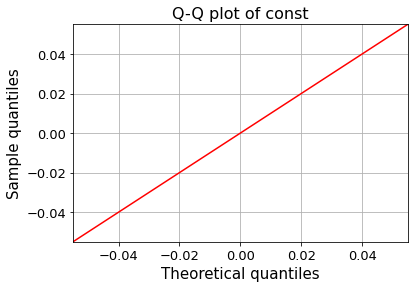

<Figure size 576x360 with 0 Axes>

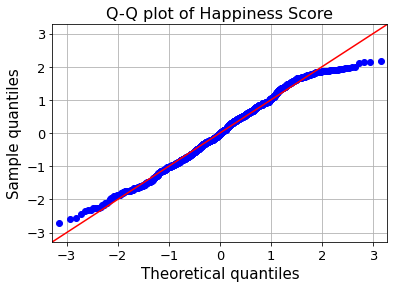

<Figure size 576x360 with 0 Axes>

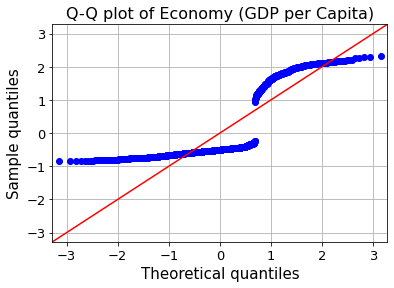

<Figure size 576x360 with 0 Axes>

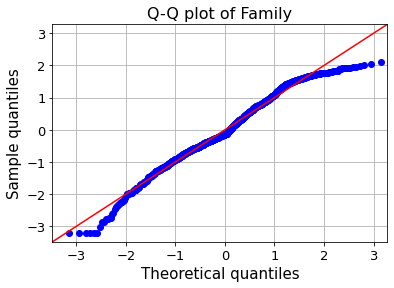

<Figure size 576x360 with 0 Axes>

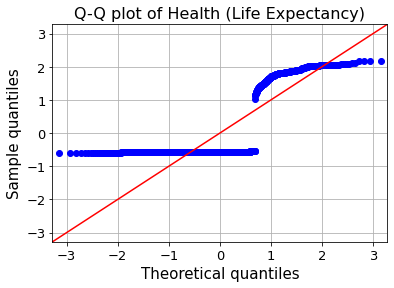

<Figure size 576x360 with 0 Axes>

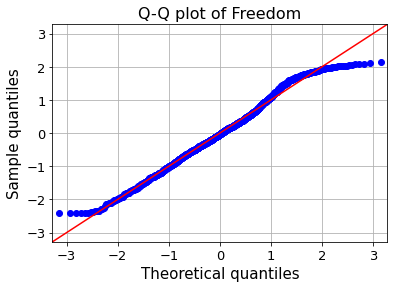

<Figure size 576x360 with 0 Axes>

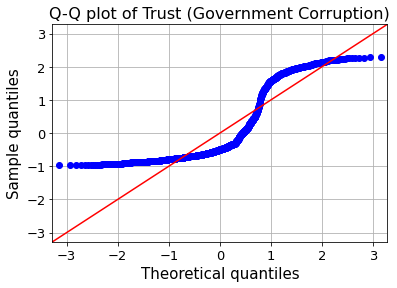

<Figure size 576x360 with 0 Axes>

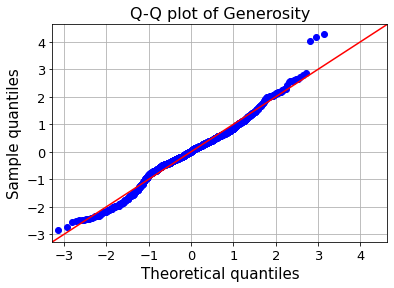

<Figure size 576x360 with 0 Axes>

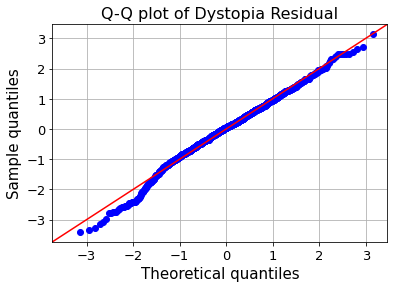

<Figure size 576x360 with 0 Axes>

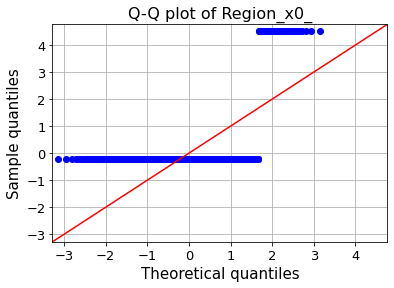

<Figure size 576x360 with 0 Axes>

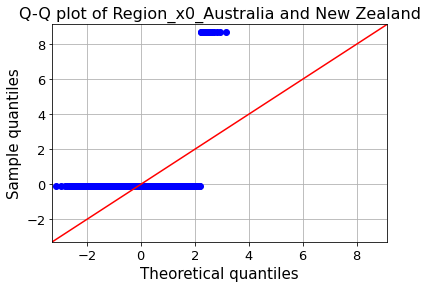

<Figure size 576x360 with 0 Axes>

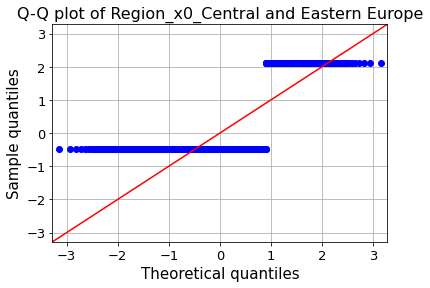

<Figure size 576x360 with 0 Axes>

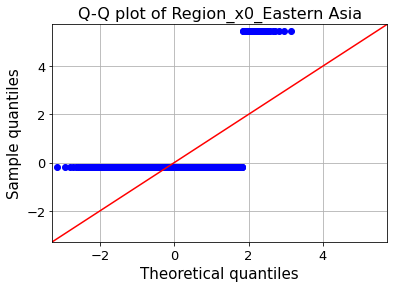

<Figure size 576x360 with 0 Axes>

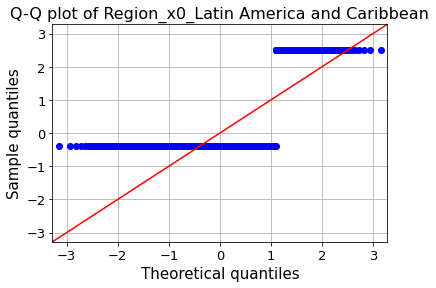

<Figure size 576x360 with 0 Axes>

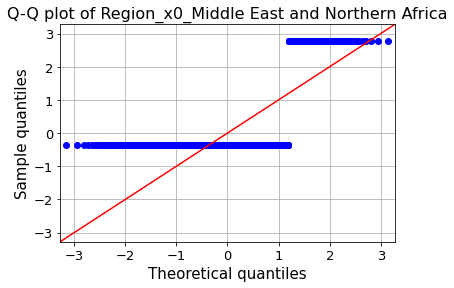

<Figure size 576x360 with 0 Axes>

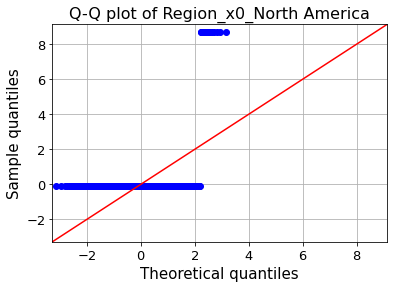

<Figure size 576x360 with 0 Axes>

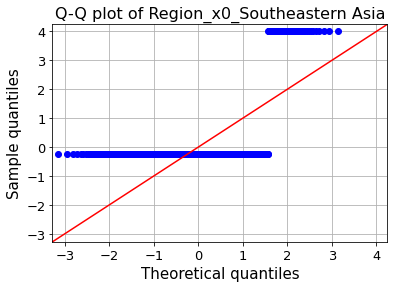

<Figure size 576x360 with 0 Axes>

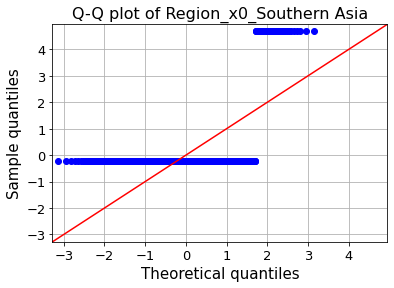

<Figure size 576x360 with 0 Axes>

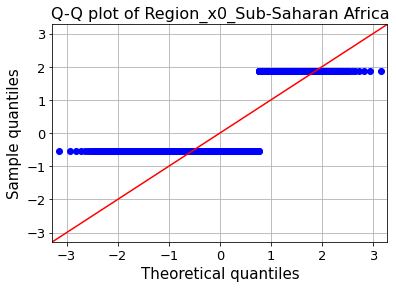

<Figure size 576x360 with 0 Axes>

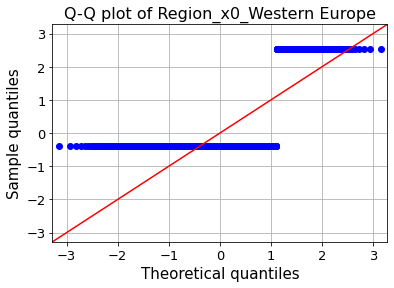

In [ ]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_temp=preprocessed_train
for c in data_temp.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_temp[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

By analyzing the QQPlot, we see that all numerical features follow a general normal distribution with slight curves for Trust (Government Corruption) and a break in Health (Life Expectancy). This shows a general normal distribution in our data because the probability plot follows a diagonal line. This suggest we can use a linear model to predict the Happiness Score of a Country but let's futher investigate our predictors relationships.

**In the multivariate models are predictor variables independent of all the other predictor variables? Is there any multicollinearity in the model?**

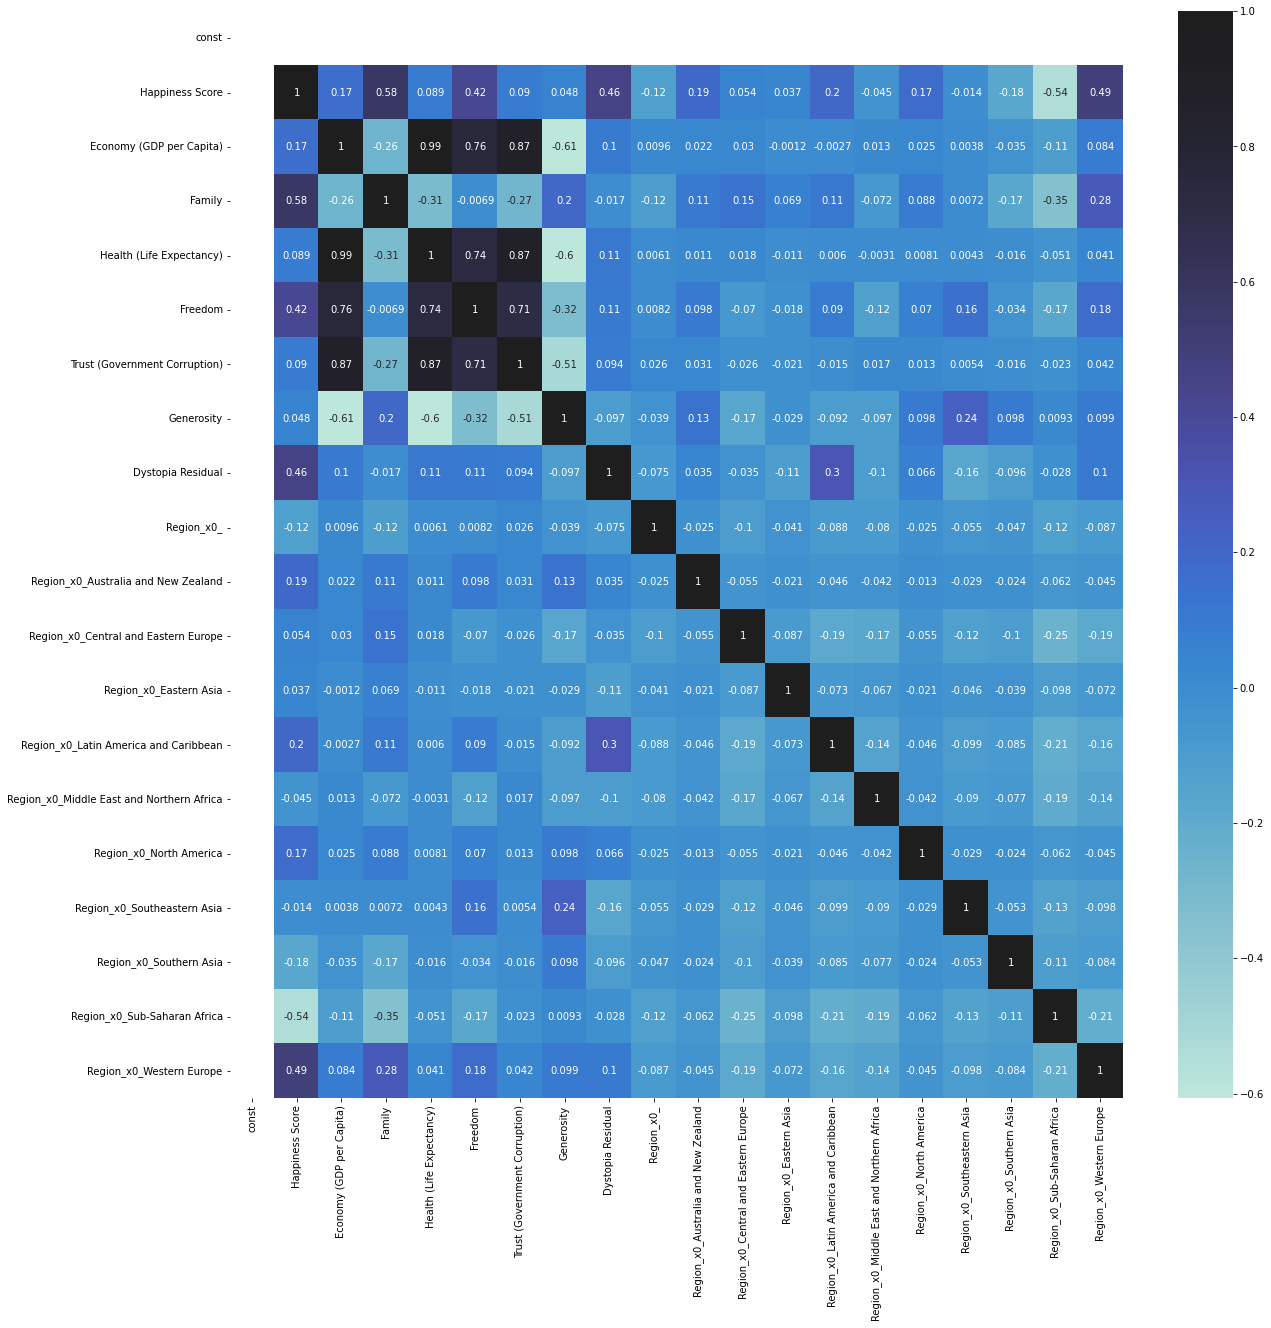

In [ ]:
plt.figure(figsize = (20, 20))
corr=preprocessed_train.corr()
sns.heatmap(corr, annot = True, center=1)
plt.show()

In this heatmap, we have plotted the correlation plot between all features. While the Region categories seem to have some correlation going on between each other, this can be explained because they stem from the original feature. However, 4 predictors display heavy multicollinearity between each other with high correlation values with each other:

1. Economy (GDP per Capita)
2. Health (Life Expectancy)
3. Freedom
4. Trust (Government Corruption)
5. Generosity

Ideally, this sounds like the best case scenario in a country to be happy. Since generosity is defined in this dataset as the proportion of people who donation to charity, we would think citizen who are healthy and prosper enough are willing to share their wealth. Countries with more freedom and less government corruption allow citizens to feel accepted and respected.

Specifically, on Happiness Scores, certain regions show a high correlation. Family and the Dystopia Residual have the most postive impacts on happiness and we may see the collinear features show an impact when the model creates an interaction variable for them. An interaction occurs when an independent variable has a different effect on the outcome depending on the values of another independent variable. By adding an interaction term to the model, we can take into account collinearity. If we did not take multicollinearity into account, these variables would undermine the statistical significance of an independent variable.

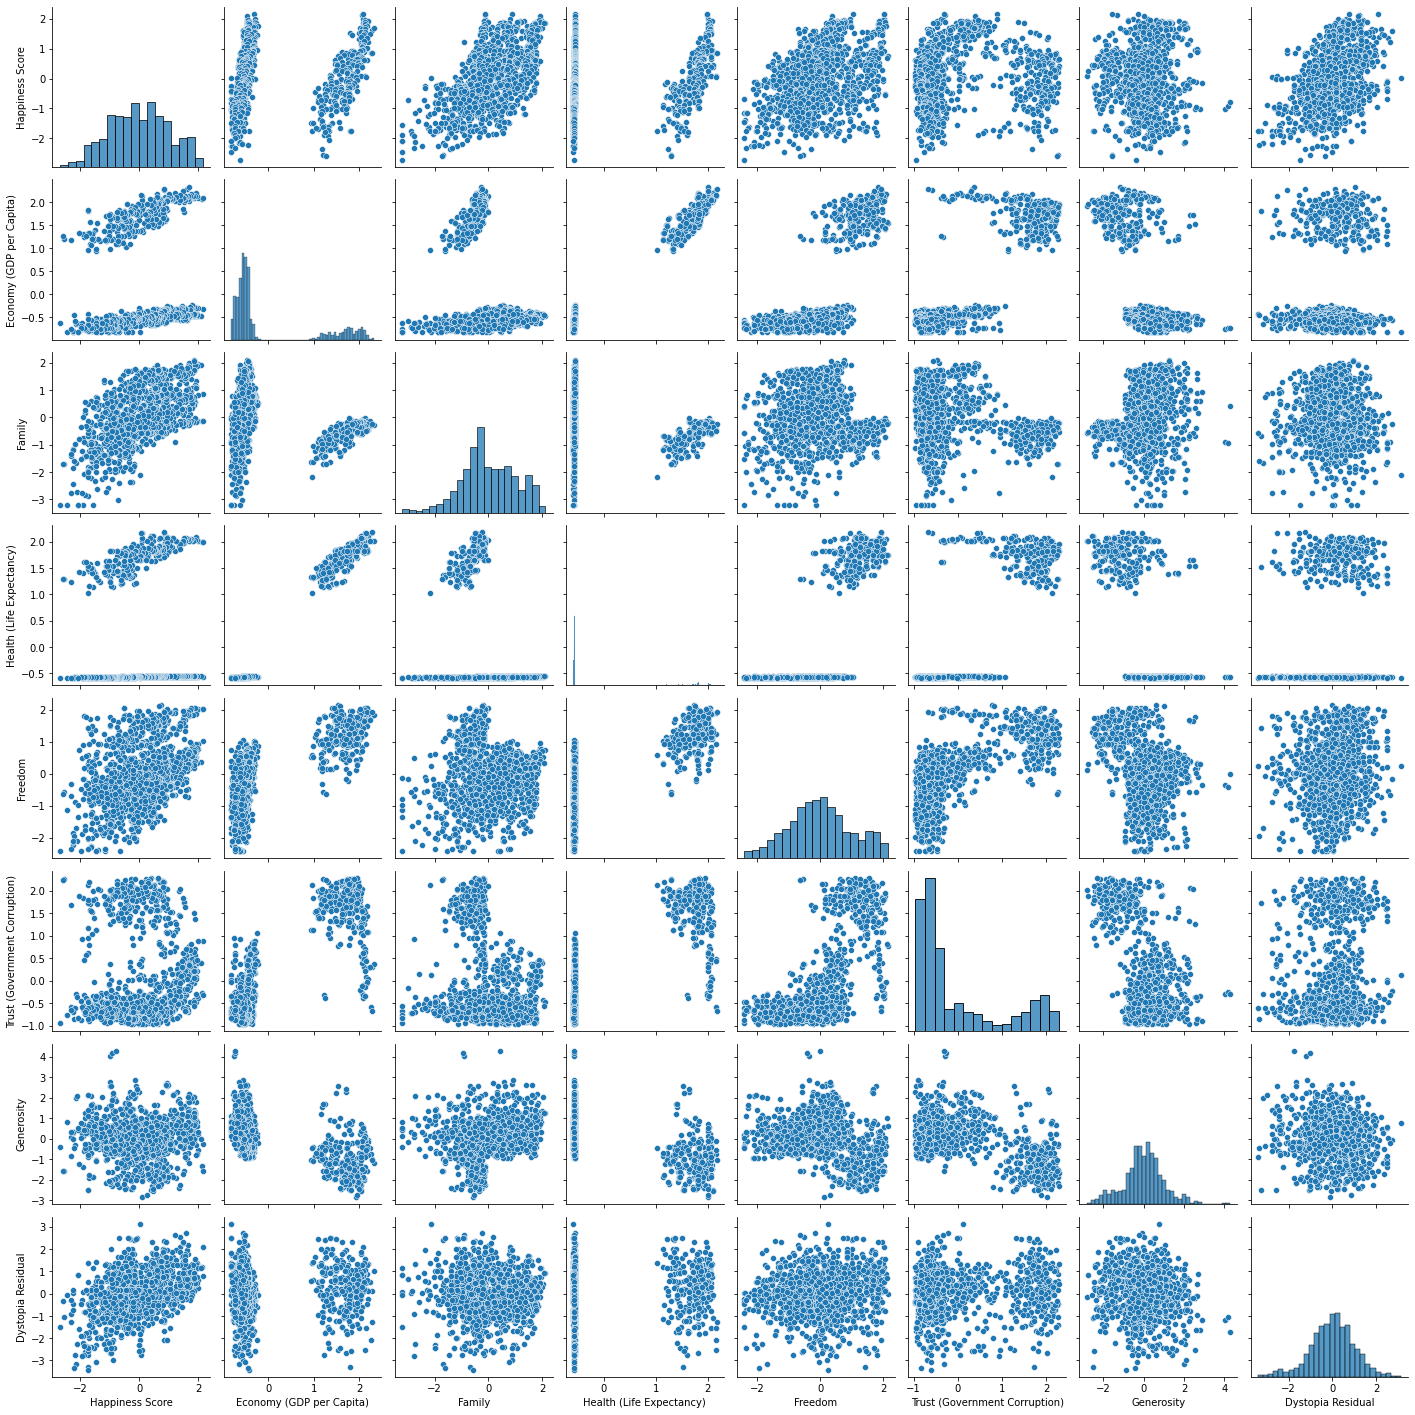

In [ ]:
sns.pairplot(preprocessed_train, vars=['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',	'Generosity',	'Dystopia Residual'])

This pairplot shows similar correlation details. However, with this plot, we can also see groups that may occur that are not visible with just metrics. For example, in Economy, we consistantly see two groups that are separated by each other. Below, we graph the unstandardized data's correlation against Region because Region has been split into groups when cleaned. We can clearly, see that for the Happiness Score, all features are separated into three colors, suggesting Region is correlated to Happiness Scores.

<Figure size 1152x720 with 0 Axes>

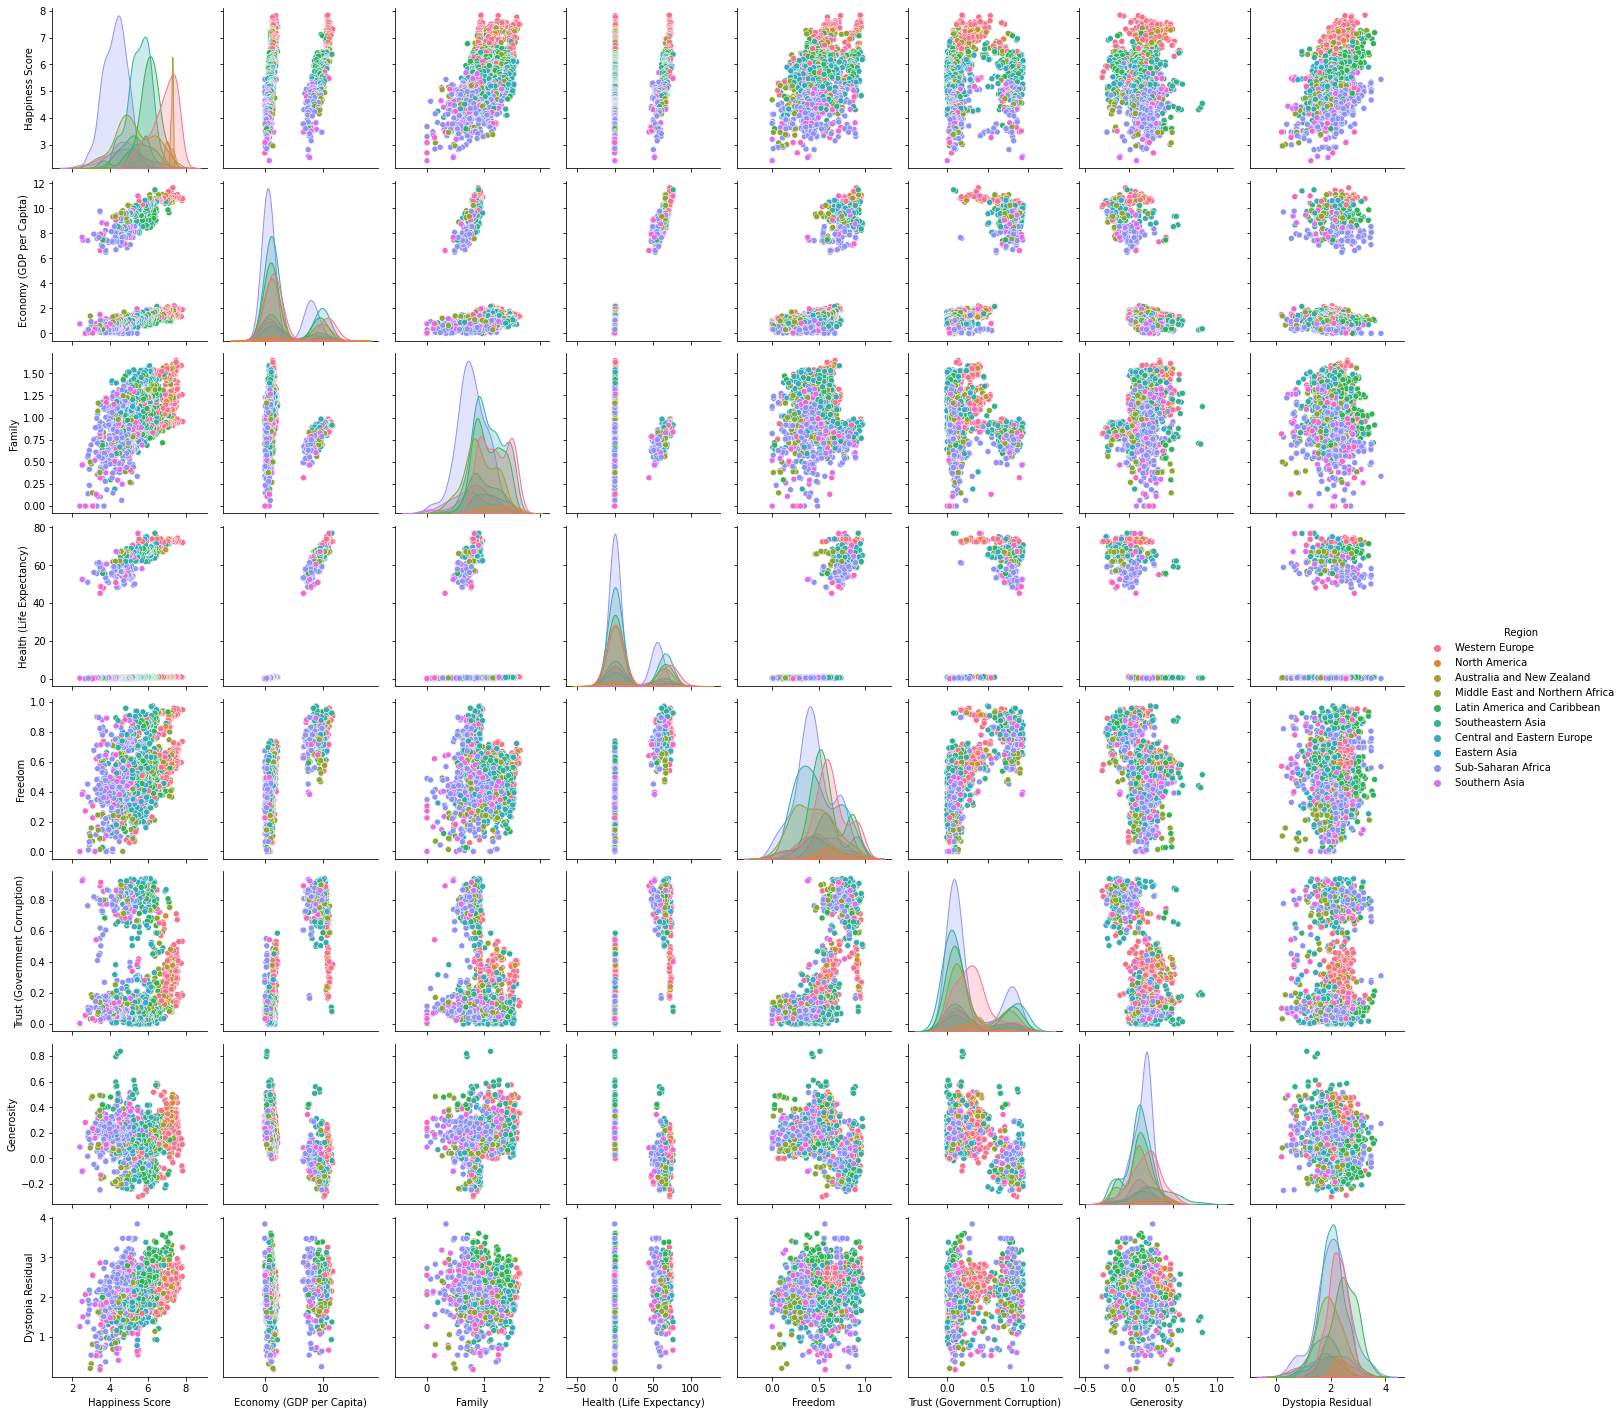

In [ ]:
plt.figure(figsize=(16,10))
sns.pairplot(merged_df, vars=['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)',	'Generosity',	'Dystopia Residual'], hue='Region')
plt.show()

While these plots are helpful in visualizing correlation, the Variance Inflation Factor (VIF) is a measure of the amount of multicollinearity in regression analysis.

In [ ]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = preprocessed_train.columns
vif["vif_Factor"] = [variance_inflation_factor(preprocessed_train.values, i) for i in range(preprocessed_train.shape[1])]
vif.head(10)

divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


,features,vif_Factor
0,const,0.000000
1,Happiness Score,10.760248
2,Economy (GDP per Capita),154.926589
3,Family,2.556285
4,Health (Life Expectancy),146.091793
5,Freedom,4.419767
6,Trust (Government Corruption),4.639321
7,Generosity,2.335320
8,Dystopia Residual,3.096833
9,Region_x0_,inf


It is usually considered to be highly correlated if the VIF value is higher than 5. As predicted, we see high VIF scores for Economy and Health. We would typically remove these features with the highest VIF score or create interaction terms. However, with the power of AutoML, we will let the software figure out how it wants to solve this for each model it creates.

**Is the relationship significant?**

In [ ]:
preprocessed_trainx = preprocessed_train.drop(['Happiness Score', 'Region_x0_'],axis=1)
model = sm.OLS(Y, preprocessed_trainx, axis =1).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     693.0
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:18:14   Log-Likelihood:                -417.43
No. Observations:                1225   AIC:                             870.9
Df Residuals:                    1207   BIC:                             962.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         5.1196      0.046    110.789      0.000       5.029       5.210
Economy (GDP per Capita)                      2.5322      0.098     25.919      0.000       2.341       2.724
Family                                        0.3057      0.013     23.604      0.000       0.280       0.331
Health (Life Expectancy)                     -2.4975      0.094    -26.561      0.000      -2.682      -2.313
Freedom                                       0.3606      0.018     20.280      0.000       0.326       0.395
Trust (Government Corruption)                -0.0851      0.021     -4.060      0.000      -0.126      -0.044
Generosity                                    0.1387      0.014      9.617      0.000       0.110       0.167
Dystopia Residual                             0.4663      0.011     43.145      0.000       0.445       0.488
Region_x0_Australia and New Zealand           1.0361      0.101     10.209      0.000       0.837       1.235
Region_x0_Central and Eastern Europe          0.4101      0.052      7.822      0.000       0.307       0.513
Region_x0_Eastern Asia                        0.6016      0.072      8.386      0.000       0.461       0.742
Region_x0_Latin America and Caribbean         0.4361      0.055      7.888      0.000       0.328       0.545
Region_x0_Middle East and Northern Africa     0.4091      0.054      7.511      0.000       0.302       0.516
Region_x0_North America                       0.8085      0.101      8.002      0.000       0.610       1.007
Region_x0_Southeastern Asia                   0.1764      0.064      2.757      0.006       0.051       0.302
Region_x0_Southern Asia                       0.0354      0.066      0.533      0.594      -0.095       0.166
Region_x0_Sub-Saharan Africa                 -0.2284      0.051     -4.465      0.000      -0.329      -0.128
Region_x0_Western Europe                      0.8997      0.057     15.900      0.000       0.789       1.011
==============================================================================
Omnibus:                       80.026   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.051
Skew:                          -0.286   Prob(JB):                     1.01e-53
Kurtosis:                       5.111   Cond. No.                         33.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Taking a look at our coefficients, we see that all features except Region in Southern Asia are significant with a t-score lower than the p-value and the confident interval overlapping 0. We also see a y-intercept of 5.1196 meaning that Countries will typically have a Happiness Score slightly above 5.

Additionally, Economy and Health show the biggest influence on happiness. However, it is shown that having a higher Health expectancy may negatively impact your happiness. Trust(Perceptions of Government Corruption) shows the least influence on happiness, maybe even a little negative influence. The Sub-Saharan region shows to most negatively impact happiness scores. Austrialia and New Zealand's region may suggest that they have higher happiness scores than other regions.

We will further drill down which fields are exactly useful in predicing ratings in a cleaner way with AutoML


##Modeling (AutoML)

###Initializing H2O


We must first install H2O and start the software.

In [ ]:
min_mem_size=6
run_time=333

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
h2o.init(strict_version_check=False) # start h2o

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 28 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_jb7y2p
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.960 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

###Finding the Best Model

Now we initialize H2O with the World Happiness Report dataset and train AutoML.

In [ ]:
data = h2o.H2OFrame(merged_df)
data.shape
data.describe()
data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:1225
Cols:9

,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
type,enum,real,real,real,real,real,real,real,real
mins,,2.404,0.0,0.0,0.0,0.0,0.0,-0.300907373,0.187
mean,,5.427185060421223,3.0554071864220376,0.9914106885477532,16.41198785490612,0.5163480048587762,0.27817630513795955,0.15269177058612232,2.087957646699333
maxs,,7.842,11.647,1.644,76.953,0.974998116,0.939,0.838,3.83772
sigma,,1.1164574694027138,3.677169645585182,0.3084876362350302,27.8535378431903,0.21416659815066794,0.2894251595191213,0.16020355859780885,0.5580201838500063
zeros,,0,6,6,6,6,7,6,0
missing,0,0,0,0,0,0,0,0,0
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201
Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.4761,2.4657
Western Europe,7.364,1.33171,1.28907,0.91087,0.6598,0.43844,0.36262,2.37119
Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [ ]:
# assign target and inputs for logistic regression
y = 'Happiness Score'
X = [name for name in data.columns if name != y]
data[y] = data[y].asnumeric()
#data[y] = data[y].asnumeric()
print(y)
print(X)

Happiness Score
['Region', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time,exclude_algos = ['DeepLearning'])

In [ ]:
aml.train(x=X,y=y,training_frame=data)  # Change training_frame=train

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.1576724,0.0087033,0.1717842,0.1501400,0.1581252,0.1508264,0.1574861
mean_residual_deviance,0.0445431,0.0036581,0.0497415,0.0396810,0.0456796,0.0433131,0.0443002
mse,0.0445431,0.0036581,0.0497415,0.0396810,0.0456796,0.0433131,0.0443002
null_deviance,306.18976,10.314721,292.13324,317.53897,299.92905,313.81815,307.52942
r2,0.9640563,0.0027490,0.9616433,0.9671835,0.9607288,0.9656264,0.9650996
residual_deviance,10.878946,0.4433780,11.191846,10.2773695,11.419911,10.78496,10.720648
rmse,0.2109102,0.0086585,0.2230281,0.1992008,0.2137280,0.2081180,0.2104761
rmsle,0.0362225,0.0023532,0.0399512,0.0341566,0.0343627,0.0358202,0.0368216


In [ ]:
#get list of best models ranked
print(aml.get_leaderboard().head(20))

model_id                                                                      rmse        mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_5_AutoML_4_20221217_183114                      0.210722  0.0444039  0.157336  0.0361865                 0.0444039
StackedEnsemble_BestOfFamily_6_AutoML_4_20221217_183114                   0.214779  0.0461299  0.161884  0.0365765                 0.0461299
StackedEnsemble_AllModels_4_AutoML_4_20221217_183114                      0.217992  0.0475205  0.16377   0.0376144                 0.0475205
StackedEnsemble_BestOfFamily_4_AutoML_4_20221217_183114                   0.222556  0.0495313  0.167859  0.0381966                 0.0495313
StackedEnsemble_BestOfFamily_3_AutoML_4_20221217_183114                   0.223171  0.0498052  0.168291  0.0382099                 0.0498052
StackedEnsemble_BestOfFamily_2_AutoML_4_20221217_183114                   0.223623  0.0500072  0.168497  0.0383019                 0.0500072
StackedEnsemb

###Cross Validation

Now, with our best model, let's train and test the model with a modified Leave-one-out and K-Fold Cross-validation. We will test one year at a time as a test set.

In [ ]:
leader_model = h2o.get_model(aml.leaderboard[10,'model_id'])
# save the model
model_path = h2o.save_model(model=leader_model, path="leader_model_h2o", force=True)

print(model_path)

# load the model
gbmmodel = h2o.load_model(model_path)

/content/leader_model_h2o/GBM_4_AutoML_4_20221217_183114


In [ ]:
#create list of dataframes to merge
data_frames2015 = [happiness2016, happiness2017, happiness2018, happiness2019,happiness2020, happiness2021, happiness2022]
data_frames2016 = [happiness2015, happiness2017, happiness2018, happiness2019,happiness2020, happiness2021, happiness2022]
data_frames2017 = [happiness2016, happiness2015, happiness2018, happiness2019,happiness2020, happiness2021, happiness2022]
data_frames2018 = [happiness2016, happiness2017, happiness2015, happiness2019,happiness2020, happiness2021, happiness2022]
data_frames2019 = [happiness2016, happiness2017, happiness2018, happiness2015,happiness2020, happiness2021, happiness2022]
data_frames2020 = [happiness2016, happiness2017, happiness2018, happiness2019,happiness2015, happiness2021, happiness2022]
data_frames2021 = [happiness2016, happiness2017, happiness2018, happiness2019,happiness2020, happiness2015, happiness2022]
data_frames2022 = [happiness2016, happiness2017, happiness2018, happiness2019,happiness2020, happiness2021, happiness2015]

In [ ]:
#merge dataframes and clean up blanks
merged2015 = pd.concat(data_frames2015,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged2015.fillna("", inplace=True)
merged2016 = pd.concat(data_frames2016,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged2016.fillna("", inplace=True)
merged2017 = pd.concat(data_frames2017,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged2017.fillna("", inplace=True)
merged2018 = pd.concat(data_frames2018,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged2018.fillna("", inplace=True)
merged2019 = pd.concat(data_frames2019,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged2019.fillna("", inplace=True)
merged2020 = pd.concat(data_frames2020,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged2020.fillna("", inplace=True)
merged2021 = pd.concat(data_frames2021,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged2021.fillna("", inplace=True)
merged2022 = pd.concat(data_frames2022,ignore_index=True).dropna(subset=['Trust (Government Corruption)','Dystopia Residual'])
merged2022.fillna("", inplace=True)
merged2015.describe()
merged2015.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [ ]:
#Set each dataframe as an h2o frame
h2otrain2015 = h2o.H2OFrame(merged2015)
h2otest2015 = h2o.H2OFrame(happiness2015)

h2otrain2016 = h2o.H2OFrame(merged2016)
h2otest2016 = h2o.H2OFrame(happiness2016)

h2otrain2017 = h2o.H2OFrame(merged2017)
h2otest2017 = h2o.H2OFrame(happiness2017)

h2otrain2018 = h2o.H2OFrame(merged2018)
h2otest2018 = h2o.H2OFrame(happiness2018)

h2otrain2019 = h2o.H2OFrame(merged2019)
h2otest2019 = h2o.H2OFrame(happiness2019)

h2otrain2020 = h2o.H2OFrame(merged2020)
h2otest2020 = h2o.H2OFrame(happiness2020)

h2otrain2021 = h2o.H2OFrame(merged2021)
h2otest2021 = h2o.H2OFrame(happiness2021)

h2otrain2022 = h2o.H2OFrame(merged2022)
h2otest2022 = h2o.H2OFrame(happiness2022)

h2otrain2015.shape
h2otrain2015.describe()
h2otrain2015.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

Rows:1067
Cols:10

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
type,enum,enum,real,real,real,real,real,real,real,real
mins,,,2.404,0.0,0.0,0.0,0.0,0.0,-0.300907373,0.187
mean,,,5.434803841626986,3.3825530678228697,0.991464698660731,18.748926093964375,0.5293394057656989,0.2981305752521089,0.14016375723336455,2.086325948647318
maxs,,,7.842,11.647,1.644,76.953,0.974998116,0.939,0.838,3.83772
sigma,,,1.1125134363243652,3.830303180532805,0.3135980753554871,29.127629431343443,0.21911510520134422,0.30161338203564503,0.16089593833848947,0.5589184430222756
zeros,,,0,5,5,5,5,6,5,0
missing,0,0,0,0,0,0,0,0,0,0
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
Norway,Western Europe,7.498,1.57744,1.1269,0.79579,0.59609,0.35776,0.37895,2.66465
Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
Canada,North America,7.404,1.44015,1.0961,0.8276,0.5737,0.31329,0.44834,2.70485
Netherlands,Western Europe,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
New Zealand,Australia and New Zealand,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
Australia,Australia and New Zealand,7.313,1.44443,1.10476,0.8512,0.56837,0.32331,0.47407,2.5465
Sweden,Western Europe,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


Below, we create a customized method to calculate error rates for each CV set.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
def return_score(model,X_train, X_test, y_train, y_test):
    model.train(x=X,y=y, training_frame=X_train, validation_frame = X_test)
    y_pred = model.predict(X_test).as_data_frame()
    y_test = y_test.as_data_frame()
    print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
    meansquare.append(mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
    r2 = r2_score(y_test,y_pred)
    print('R^2 score on training set =',r2)
    return r2


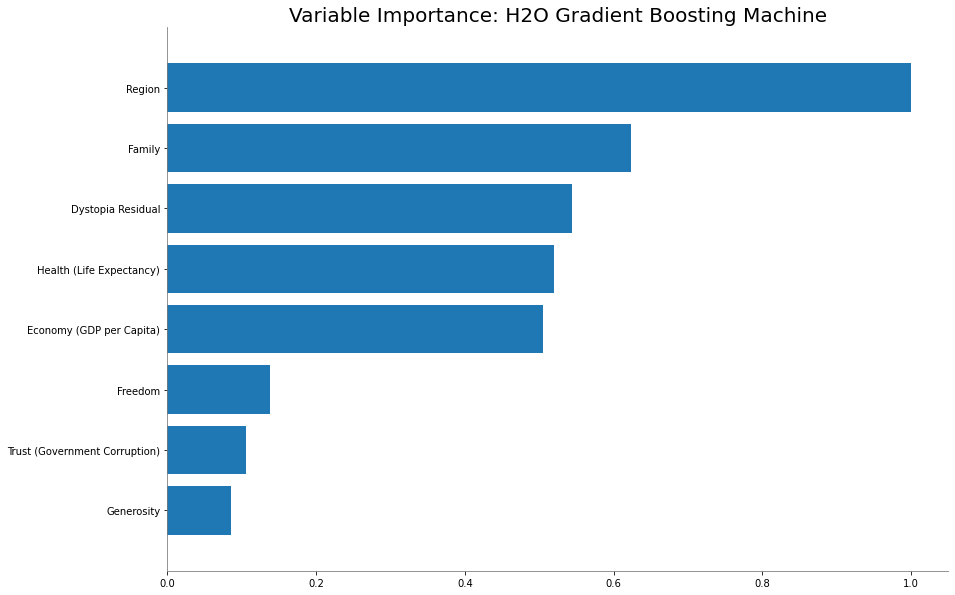

<Figure size 432x288 with 0 Axes>

In [ ]:
gbmmodel.varimp_plot()

With training using just the merged dataset, we obtain several important variables including Family, Region, Dystopia Residual, Economy, and Health.

###Predicting Happiness using Best Model by Year

In [ ]:
scores = []
meansquare = []

In [ ]:
y_train = h2otrain2015['Happiness Score'].asnumeric()
y_test = h2otest2015['Happiness Score'].asnumeric()

score = return_score(gbmmodel,h2otrain2015, h2otest2015, y_train, y_test)
scores.append(score)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Mean squared error: 0.06
Coefficient of determination: 0.95
R^2 score on training set = 0.9516775255358174


In [ ]:
y_train = h2otrain2016['Happiness Score'].asnumeric()
y_test = h2otest2016['Happiness Score'].asnumeric()

score = return_score(gbmmodel,h2otrain2016, h2otest2016, y_train, y_test)
scores.append(score)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Mean squared error: 0.07
Coefficient of determination: 0.94
R^2 score on training set = 0.9437445802478345


In [ ]:
y_train = h2otrain2017['Happiness Score'].asnumeric()
y_test = h2otest2017['Happiness Score'].asnumeric()

score = return_score(gbmmodel,h2otrain2017, h2otest2017, y_train, y_test)
scores.append(score)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset column 'Region' has levels not trained on: ["nan"]


Mean squared error: 0.06
Coefficient of determination: 0.95
R^2 score on training set = 0.9491109608704731


In [ ]:
y_train = h2otrain2018['Happiness Score'].asnumeric()
y_test = h2otest2018['Happiness Score'].asnumeric()

score = return_score(gbmmodel,h2otrain2018, h2otest2018, y_train, y_test)
scores.append(score)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset column 'Region' has levels not trained on: ["nan"]


Mean squared error: 0.11
Coefficient of determination: 0.91
R^2 score on training set = 0.9087749442927067


In [ ]:
y_train = h2otrain2019['Happiness Score'].asnumeric()
y_test = h2otest2019['Happiness Score'].asnumeric()

score = return_score(gbmmodel,h2otrain2019, h2otest2019, y_train, y_test)
scores.append(score)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset column 'Region' has levels not trained on: ["nan"]


Mean squared error: 0.10
Coefficient of determination: 0.92
R^2 score on training set = 0.9200209072933706


In [ ]:
y_train = h2otrain2020['Happiness Score'].asnumeric()
y_test = h2otest2020['Happiness Score'].asnumeric()

score = return_score(gbmmodel,h2otrain2020, h2otest2020, y_train, y_test)
scores.append(score)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset column 'Region' has levels not trained on: ["nan"]


Mean squared error: 0.14
Coefficient of determination: 0.88
R^2 score on training set = 0.8828681130309071


In [ ]:
y_train = h2otrain2021['Happiness Score'].asnumeric()
y_test = h2otest2021['Happiness Score'].asnumeric()

score = return_score(gbmmodel,h2otrain2021, h2otest2021, y_train, y_test)
scores.append(score)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset column 'Region' has levels not trained on: ["nan"]


Mean squared error: 0.21
Coefficient of determination: 0.81
R^2 score on training set = 0.8135970825402083


In [ ]:
y_train = h2otrain2022['Happiness Score'].asnumeric()
y_test = h2otest2022['Happiness Score'].asnumeric()

score = return_score(gbmmodel,h2otrain2022, h2otest2022, y_train, y_test)
scores.append(score)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset column 'Region' has levels not trained on: ["nan"]


Mean squared error: 0.18
Coefficient of determination: 0.85
R^2 score on training set = 0.8497518144543122


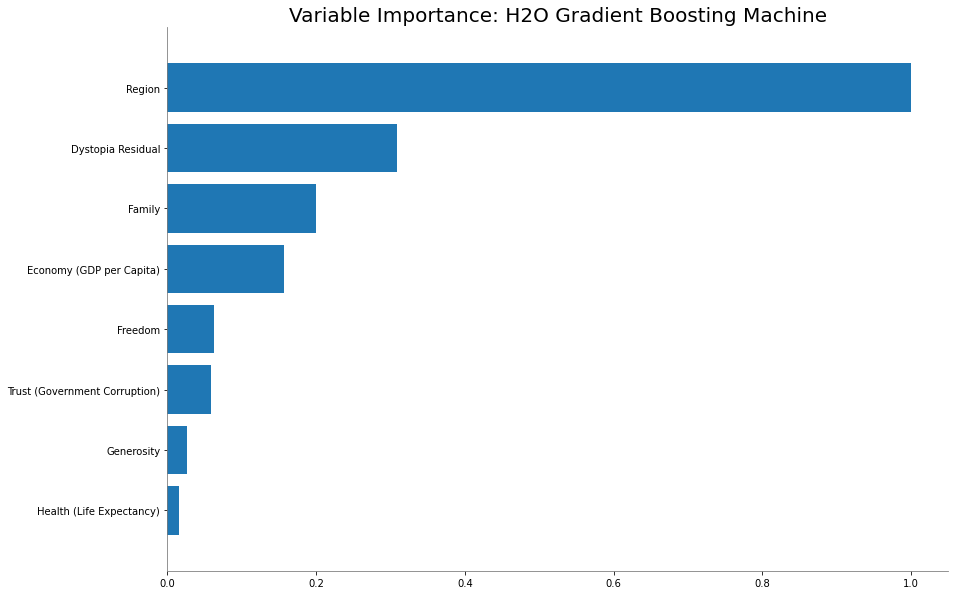

<Figure size 432x288 with 0 Axes>

In [ ]:
gbmmodel.varimp_plot()

After we are done with cross-validating, we see the model's important feature drastically changes to Region being the most influential factor in predicting happiness. In turn, the rest of the predictors are very far behind.

In [ ]:
print("Average R^2 Score: {}".format(np.mean(scores)))

Average R^2 Score: 0.9024432410332037


In [ ]:
years = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

Text(0.5, 1.0, 'CV Error by Test Set')

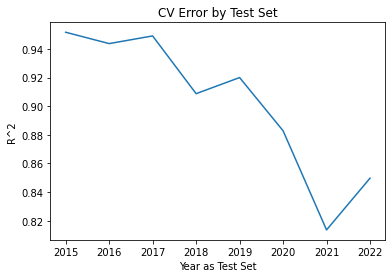

In [ ]:
plt.plot(years, scores, label="R^2")
plt.xlabel("Year as Test Set")
plt.ylabel("R^2")
plt.title("CV Error by Test Set")

Based on our method, we see that the R² value is always above 0.5 but gets worse over time. Inversely, the MSE grows slightly overtime but is below 0.25. This in addition to an average R^2 value of 0.9 tells us this is a very good model for predicting happiness in countries.

Text(0.5, 1.0, 'CV Error by Test Set')

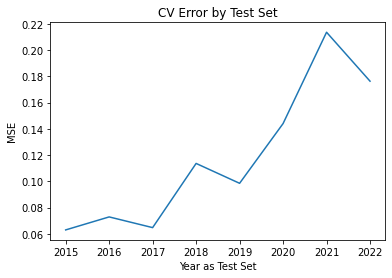

In [ ]:
plt.plot(years, meansquare, label="R^2")
plt.xlabel("Year as Test Set")
plt.ylabel("MSE")
plt.title("CV Error by Test Set")

##Model Interpretation

First, initialize shap values by obtaining contributions of each feature.

In [ ]:
#gbm_shap_values = shap.KernelExplainer(gbmmodel.predict,test)
contributions = gbmmodel.predict_contributions(data)


contributions progress: |████████████████████████████████████████████████████████| (done) 100%


Test/Validation dataset column 'Region' has levels not trained on: ["nan"]


In [ ]:
# convert the H2O Frame to use with shap's visualization functions
contributions_matrix = contributions.as_data_frame().values
# shap values are calculated for all features
shap_values = contributions_matrix[:,0:8]
# expected values is the last returned column
expected_value = contributions_matrix[:,8].min()

###Visualize Datapoints

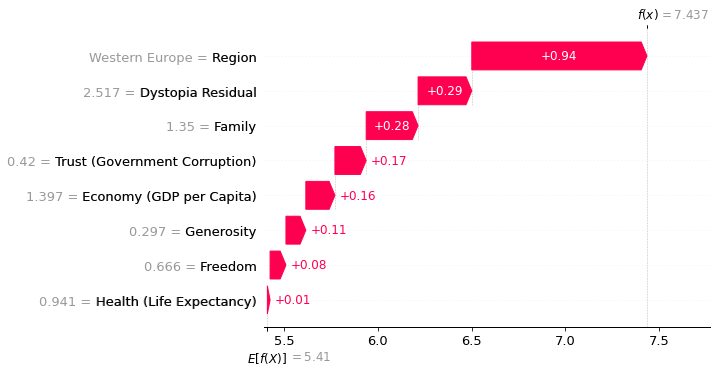

In [ ]:
#Plot shap values for the first entry
X = merged_df.drop('Happiness Score', axis = 1)

shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[0,:], X.iloc[0,:])

The actual output for this observation is 5.41. The predicted value for the first observation is 7.437. In this instance, we see all features give a postive impact on this particular country. This observation shows Region being Western Europe having the biggest impact of all. Health, Freedom, and Generosity have little to none impact on happiness suggesting this may be a long established country such as England who has financial stability in the country.

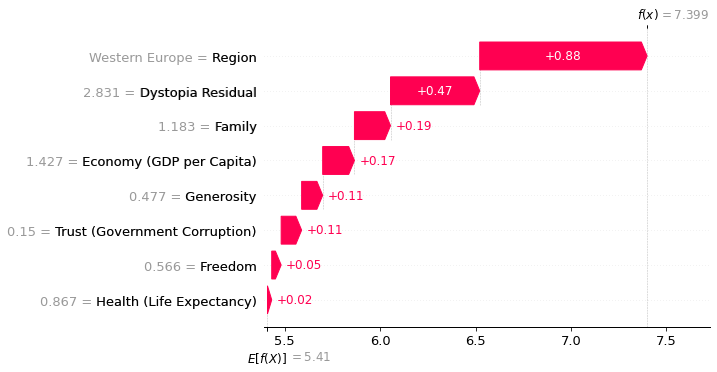

In [ ]:
#Plot shap values for the 160th entry
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[160,:], X.iloc[160,:])

The actual output for this observation is 5.41. The predicted value for the first observation is 7.399. Similar to above, we see all features give a postive impact on this country. This observation shows Region being Western Europe having the biggest impact of all. Health, Freedom, and Generosity have little to none impact on happiness suggesting this country is very stable in all factors and generally happy.

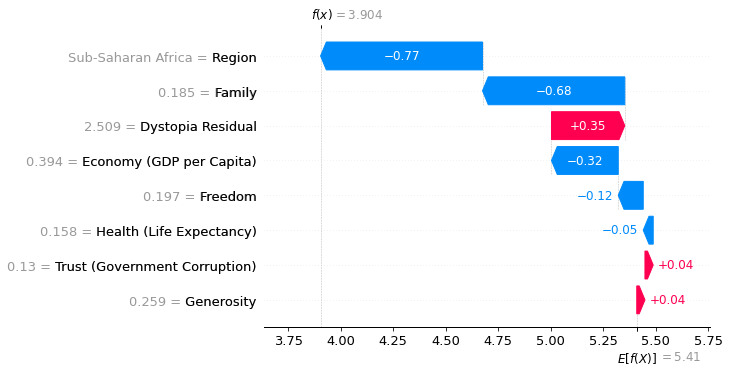

In [ ]:
#Plot shap values for the 300th entry
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[300,:], X.iloc[300,:])

The actual output for this observation is 5.41. The predicted value for the first observation is 3.094. This country shows a similar pattern of Region showing the biggest impact on happiness. There is a small portion of individuals participating in charity and some dystopian impact on this country. Like we predicted, however, this observation shows Region being Sub-Saharan Africa which significantly negatively impacts their happiness score. There is not great life expectancy, freedom, or economy, further showing that Region along with the collinear variables have an impact on happiness.

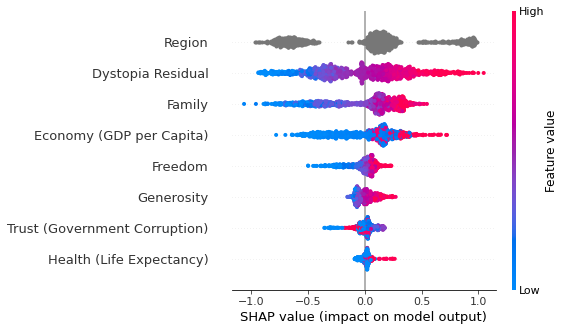

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

In the summary plot for the GBM model, all Shapley values are centered around 0, showing equal distribution of impact on value. However, Region is shown to be clearly broken up into three groups. All other features except trust show a distinction between negative and postive impacts on their data.

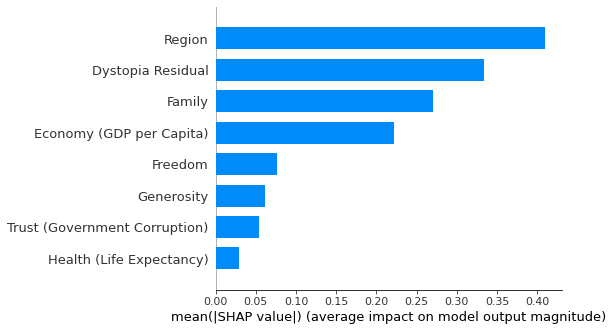

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")


As we've seen in the force plot above, Region, Dystopian Residual, Family, and Economy (GDP per Capita) show the biggest impact on happiness with mean shap values above 0.20.

#Conclusion

During this analysis, we predicted the happiness index for each country based on its features. By analyzing each feature, we see that there is multicolinearity within the features. The most influential feature was shown to be the GDP per capita,  but by using AutoML we found Region to surpass all predictors as the most important. However, the best model for this dataset was also found to be Gradient Boosting Machines. This dataset violates GBM's main assumption that all variables are ordinal. Using cross-validation with each year as a test set, we can further discover that the happiness score was impacted by the presented predictors. Finally, we use SHAP values to understand how each feature, specifically Region, impacts each country at a timepoint in detail.

# Acknowledgements

This notebook was adapted from WHR: Happiness, Politics and Population  https://www.kaggle.com/datasets/unsdsn/world-happiness and https://www.kaggle.com/code/geniavs/whr-happiness-politics-and-population/data

# References

1. Sckit learn offcial documentation
2. Refered Towards Data Science
3. Eli5 official documentation
4. https://towardsdatascience.com/multi-collinearity-in-regression-fe7a2c1467ea
5. H2O.ai Official Documentation

The algorithms were referred directly from the **Sckit learn official documentation**. Visualization was referred from the  Machine Learning with scikit-learn Quick Start Guide and **Towards Data Science** (How do you check the quality of your regression model in Python?).  The remaining code was written independently. Feature importance reference is taken from **eli5 offical documentation**

